In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('../data/final_04_20.csv', index_col=0, parse_dates=[0])

N = df.shape[0]

SPY_DIV = 0.018
UPRO_DIV = 0.0025

N_YEAR = 250

##### This noebook uses the cleaned ten minute data from 2004, which is unecessary and inaccurate, beter to simply use daily historical data - which goes back a lot farther in time anyways. 

[Historical S&P Dividend Yields](https://www.multpl.com/s-p-500-dividend-yield)

In [3]:
df[:2]

,0,1,2,3,4,5,6,7,8,9,...,380,381,382,383,384,385,386,387,388,389
2004-03-05,-0.003906,-0.004201,-0.004331,-0.004686,-0.004885,-0.004660,-0.005041,-0.004469,-0.004235,-0.003820,...,0.003083,0.003083,0.002858,0.002780,0.002936,0.002936,0.002858,0.002555,0.002477,0.002399
2004-03-08,-0.000069,-0.000346,-0.000130,0.000251,0.000397,0.000553,0.000397,0.000709,0.000709,0.001244,...,-0.006947,-0.007025,-0.007249,-0.007941,-0.008096,-0.008390,-0.008390,-0.008692,-0.008615,-0.008917


In [4]:
df[-2:]

,0,1,2,3,4,5,6,7,8,9,...,380,381,382,383,384,385,386,387,388,389
2020-04-02,-0.001056,0.000085,0.000886,0.001380,0.003928,0.005364,0.003924,0.00271,0.004317,0.003362,...,0.021296,0.019127,0.019362,0.019079,0.021368,0.022368,0.023509,0.022222,0.022109,0.021769
2020-04-03,-0.004700,-0.003195,-0.001893,-0.001726,-0.001271,-0.001255,-0.002245,-0.00093,-0.001833,0.000867,...,-0.011514,-0.012333,-0.012222,-0.012852,-0.012353,-0.014986,-0.013767,-0.015869,-0.015069,-0.014693


Each row of `df` is a day of SPX (S&P 500) as a relative difference in proportion to the closing price of the previous trading day, such that -0.01 would indicate a 1% drop from the previous day's closing price. 

Each entry of `dl` is the end of day multiple of the previous trading day's closing price, such that 1.05 would indicate a 5% increase. 

In [5]:
dl = df.iloc[:,-1] + 1

In [6]:
dl

2004-03-05    1.002399
2004-03-08    0.991083
2004-03-09    0.994464
2004-03-10    0.985473
2004-03-11    0.984396
                ...   
2020-03-30    1.033789
2020-03-31    0.984616
2020-04-01    0.955999
2020-04-02    1.021769
2020-04-03    0.985307
Name: 389, Length: 3984, dtype: float64

In [7]:
# Some error with actual numbers - not bad for 16 years however.
print(2488.57 / 1154.34)
np.product(dl)

2.155837968016356


1.943474563673584

In [8]:
dl3 = 3*(dl-1) + 1

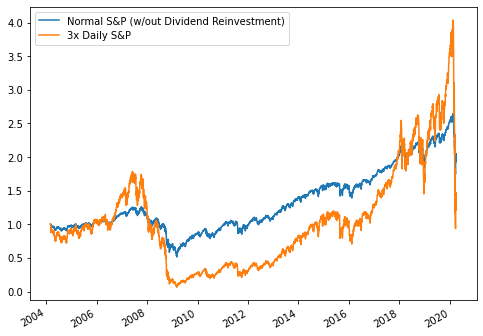

In [9]:
plt.figure(figsize=(8, 6))
np.cumprod(dl).plot(label='Normal S&P (w/out Dividend Reinvestment)')
np.cumprod(dl3).plot(label='3x Daily S&P')
plt.legend()
plt.savefig('3x_vs_1x.png', dpi=300);

In [10]:
# After the 2008 recession, 3x daily got to 6% of 2004 principal!!
np.cumprod(dl3).min()

0.06580342724548821

## Annual Reblancing of Leverage

In [55]:
lev = np.linspace(0, 1, 41)

In [54]:
n_split = N_YEAR
rebalance_idxs = np.arange(n_split, dl.size, n_split)

In [56]:
dls = np.array([np.product(s) for s in np.split(dl, rebalance_idxs)]) + SPY_DIV*n_split/N_YEAR

dl3s = np.array([np.product(s) for s in np.split(dl3, rebalance_idxs)]) + UPRO_DIV*n_split/N_YEAR

agg = (1-lev).reshape(-1, 1)*dls + lev.reshape(-1, 1)*dl3s

results = np.product(agg, axis=1)

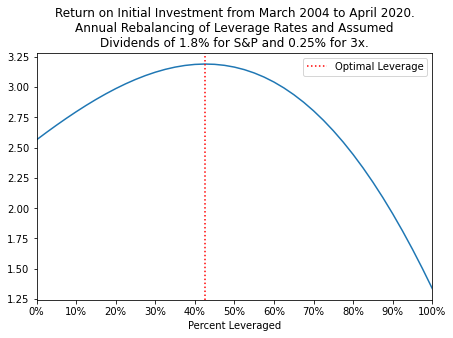

In [125]:
plt.figure(figsize=(6.4, 4.8))
plt.plot(lev, results)
plt.axvline(x=lev[np.argmax(results)], 
            linestyle=':', c='r', label='Optimal Leverage')
plt.xticks(lev[::4], ['{:.0%}'.format(p) for p in lev[::4]])
plt.xlim(0, 1)
plt.xlabel('Percent Leveraged')
plt.title('Return on Initial Investment from March 2004 to April 2020.\n\
Annual Rebalancing of Leverage Rates and Assumed\n\
Dividends of {:.1%} for S&P and {:.2%} for 3x.'.format(SPY_DIV, UPRO_DIV))
plt.legend()
plt.tight_layout()
plt.savefig('annual_rebalancing-max_timeperiod.png', dpi=300);

#### Try different rebalancing times

In [116]:
timescales = np.arange(100, 450, 50)

scheme = sns.color_palette('viridis', timescales.size)

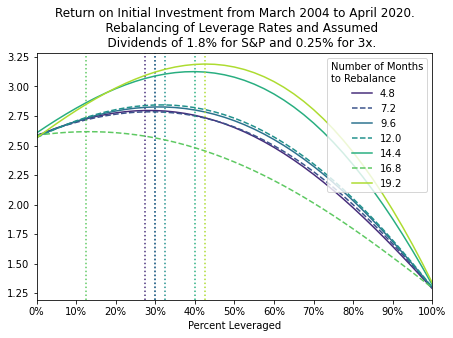

In [126]:
plt.figure(figsize=(6.4, 4.8))
for i, n_split in enumerate(timescales):
    if i%2==1:
        linestyle='--'
    else:
        linestyle='-'
    rebalance_idxs = np.arange(n_split, dl.size, n_split)

    lev = np.linspace(0, 1, 41)
    dls = np.array([np.product(s) for s in np.split(dl, rebalance_idxs)]) + SPY_DIV*n_split/N_YEAR
    dl3s = np.array([np.product(s) for s in np.split(dl3, rebalance_idxs)]) + UPRO_DIV*n_split/N_YEAR
    agg = (1-lev).reshape(-1, 1)*dls + lev.reshape(-1, 1)*dl3s
    results = np.product(agg, axis=1)

    plt.plot(lev, results, label='{:.1f}'.format(12 * n_split / N_YEAR), color=scheme[i], linestyle=linestyle)
    plt.axvline(x=lev[np.argmax(results)], 
                linestyle=':', color=scheme[i])
    
plt.xticks(lev[::4], ['{:.0%}'.format(p) for p in lev[::4]])
plt.xlim(0, 1)
plt.xlabel('Percent Leveraged')
plt.title('Return on Initial Investment from March 2004 to April 2020.\n\
    Rebalancing of Leverage Rates and Assumed\n\
    Dividends of {:.1%} for S&P and {:.2%} for 3x.'.format(SPY_DIV, UPRO_DIV))
plt.legend(title='Number of Months\nto Rebalance', loc='upper right')
plt.tight_layout()
plt.savefig('diff_rebalancing-max_timperiod.png', dpi=300)
plt.show()

In [1]:
df

NameError: name 'df' is not defined